## 01MIAR - Actividad Final

- Alumno: Julio Emanuel Suriano Bryk
- Fecha de entrega: 20/06/2024
- Dataset: [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)


### Planificacion y objetivos del Análisis

Para estructurar correctamente el Análisis de los datos se va a seguir el metodo de Exploratory Data Analysis (EDA), basado en el libro de [Python for Data Analysis](https://wesmckinney.com/book/) de Wes McKinney. Las etapas definidas son:

1. Recolección y Carga de Datos:

   - reunir y cargar los datos en la herramienta de análisis.

2. Limpieza de Datos:

   - Identificar y manejar valores faltantes.
   - Corregir errores y eliminar duplicados.
   - Manejar valores atípicos y realizar transformaciones necesarias.

3. Análisis Descriptivo:

   - Explorar cada variable individualmente usando estadísticas descriptivas.
   - Visualizar las distribuciones de las variables.

4. Análisis de Relaciones y Visualización de Datos:

   - Examinar las relaciones entre pares de variables con scatter plots, tablas de contingencia, etc.
   - Crear gráficos para visualizar patrones y tendencias en los datos.

5. Generación de Insights y Comunicación:

   - Interpretar los resultados y formular hipótesis.
   - Documentar los hallazgos y preparar informes para comunicar los insights a los interesados.

El proyecto va a estar dividido por cada de unos de las fases, de modo tal que se pueda identificar claramente cada una de ellas.


### Descripcion del Data Set

El dataset elegido es el de [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales) de Kaggle, donde la descripción es la siguiente:

> This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/).

Fields include:

- `Rank` - Ranking of overall sales
- `Name` - The games name
- `Platform` - Platform of the games release (i.e. PC,PS4, etc.)
- `Year` - Year of the game's release
- `Genre` - Genre of the game
- `Publisher` - Publisher of the game
- `NA_Sales` - Sales in North America (in millions)
- `EU_Sales` - Sales in Europe (in millions)
- `JP_Sales` - Sales in Japan (in millions)
- `Other_Sales` - Sales in the rest of the world (in millions)
- `Global_Sales` - Total worldwide sales.


### 0. Setup del proyecto


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Avoid annoying warning for deprecations ...
warnings.simplefilter(action="ignore", category=FutureWarning)

# allow inline plotting with matplot
%matplotlib inline

### 1. Recolección y Carga de Datos


In [2]:
# path to remote file stored in Github public repository
repo_path = "https://raw.githubusercontent.com/EmaSuriano/python-demos/main"
ds_path = "data-science/ds/vgsales.csv"

# Load dataset using pandas
df = pd.read_csv(f"{repo_path}/{ds_path}")

In [3]:
# Display dataset
display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Shape of DS (amount of items and features)
df.shape

(16598, 11)

### 2. Limpieza de Datos


In [5]:
# Get amount of missing values by column
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Check for duplicated record
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [7]:
# Convert year to Datetime
df["Year"] = pd.to_datetime(df["Year"], format="%Y")

In [8]:
# Get rid of NA values to avoid data pollution
df["Publisher"].fillna("Unknown", inplace=True)
df.dropna(axis=0, how="any", inplace=True)

In [9]:
# cleanup Platforms with less than 1M of sales
MIN_SALES_AMOUNT = 1

platform_sales = df.groupby("Platform")["Global_Sales"].sum().reset_index()
min_sales_mask = platform_sales["Global_Sales"] < MIN_SALES_AMOUNT

platform_games_min_sales_mask = df["Platform"].isin(
    platform_sales[min_sales_mask]["Platform"]
)


df = df[~platform_games_min_sales_mask]

### 3. Análisis Descriptivo


In [10]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16320 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16320 non-null  int64         
 1   Name          16320 non-null  object        
 2   Platform      16320 non-null  object        
 3   Year          16320 non-null  datetime64[ns]
 4   Genre         16320 non-null  object        
 5   Publisher     16320 non-null  object        
 6   NA_Sales      16320 non-null  float64       
 7   EU_Sales      16320 non-null  float64       
 8   JP_Sales      16320 non-null  float64       
 9   Other_Sales   16320 non-null  float64       
 10  Global_Sales  16320 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
# get summary statistics for numerical features
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16320.000000,16320,16320.000000,16320.000000,16320.000000,16320.000000,16320.000000
mean,8290.544853,2006-05-31 04:19:51.176470528,0.265529,0.147618,0.078675,0.048346,0.540443
min,1.000000,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4134.750000,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.500000,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.250000,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020-01-01 00:00:00,41.490000,29.020000,10.220000,10.570000,82.740000
std,4792.191251,NaN,0.821749,0.508866,0.311622,0.189924,1.566034


In [12]:
# Get amount of missing values by column
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### 4. Análisis de Relaciones y Visualización de Datos


In [13]:
import pandas as pd

# Create Manufacturers to add extra information to the DS
manufacturers = [
    ["Nintendo", ["WiiU", "GC", "SNES", "N64", "3DS", "NES", "GB", "GBA", "DS", "Wii"]],
    ["Sony", ["PSV", "PS4", "PSP", "PS", "PS3", "PS2"]],
    ["Sega", ["GG", "SCD", "DC", "GEN", "SAT"]],
    ["Microsoft", ["XOne", "XB", "X360"]],
    ["Unknown", ["3DO"]],
    ["NEC", ["TG16", "PCFX"]],
    ["Bandai", ["WS"]],
    ["SNK", ["NG"]],
    ["Atari", ["2600"]],
    ["PC", ["PC"]],
]

manufacturers_df = pd.DataFrame(manufacturers, columns=["Manufacturer", "Platform"])

# we explode the list to have a single entry by platform in order to perform a merge
manufacturers_exploded_df = manufacturers_df.explode("Platform")

# add check if Manufacturer column is present in df, to allow running the cell more than once
if "Manufacturer" not in df:
    df = df.merge(manufacturers_exploded_df, on="Platform", how="inner")

df.value_counts("Manufacturer")

Manufacturer
Sony         6565
Nintendo     6169
Microsoft    2251
PC            943
Sega          258
Atari         116
SNK            12
Bandai          6
Name: count, dtype: int64

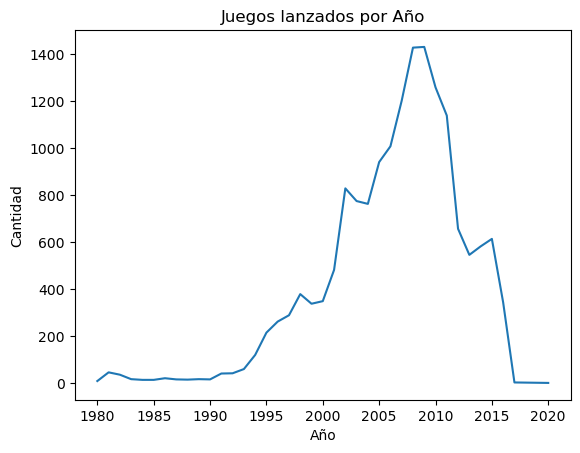

In [14]:
# Games shipped by year
games_year = df.value_counts("Year").reset_index()
sns.lineplot(data=games_year, x="Year", y="count")

plt.title("Juegos lanzados por Año")
plt.ylabel("Cantidad")
plt.xlabel("Año")

plt.show()

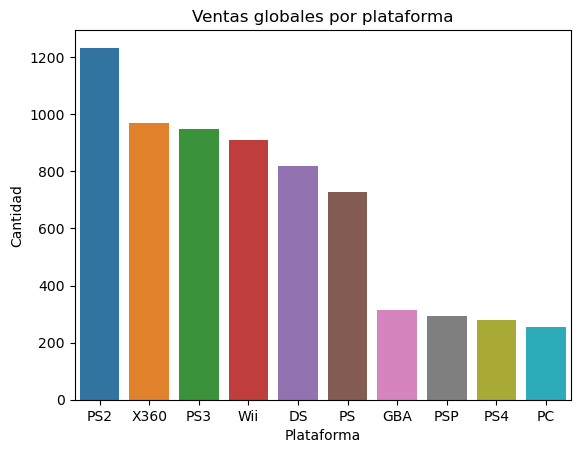

In [15]:
platform_by_sales = df.groupby("Platform").agg({"Global_Sales": "sum"}).reset_index()
top_10_platforms = platform_by_sales.sort_values(by="Global_Sales", ascending=False)[
    0:10
]

sns.barplot(data=top_10_platforms, x="Platform", y="Global_Sales")

plt.title("Ventas globales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad")

plt.show()

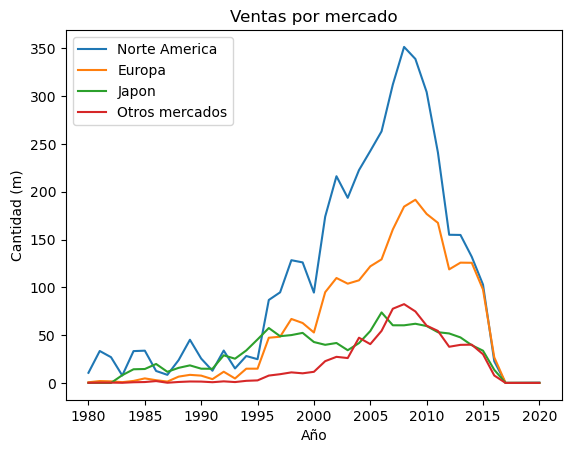

In [16]:
# Sales by Market in the years

markets = [
    {"name": "Norte America", "key": "NA_Sales"},
    {"name": "Europa", "key": "EU_Sales"},
    {"name": "Japon", "key": "JP_Sales"},
    {"name": "Otros mercados", "key": "Other_Sales"},
]

agg_obj = {market["key"]: "sum" for market in markets}

yearly_sales = df.groupby("Year").agg(agg_obj).reset_index()

for market in markets:
    sns.lineplot(yearly_sales, x="Year", y=market["key"], label=market["name"])

plt.title("Ventas por mercado")
plt.ylabel("Cantidad (m)")
plt.xlabel("Año")
plt.show()

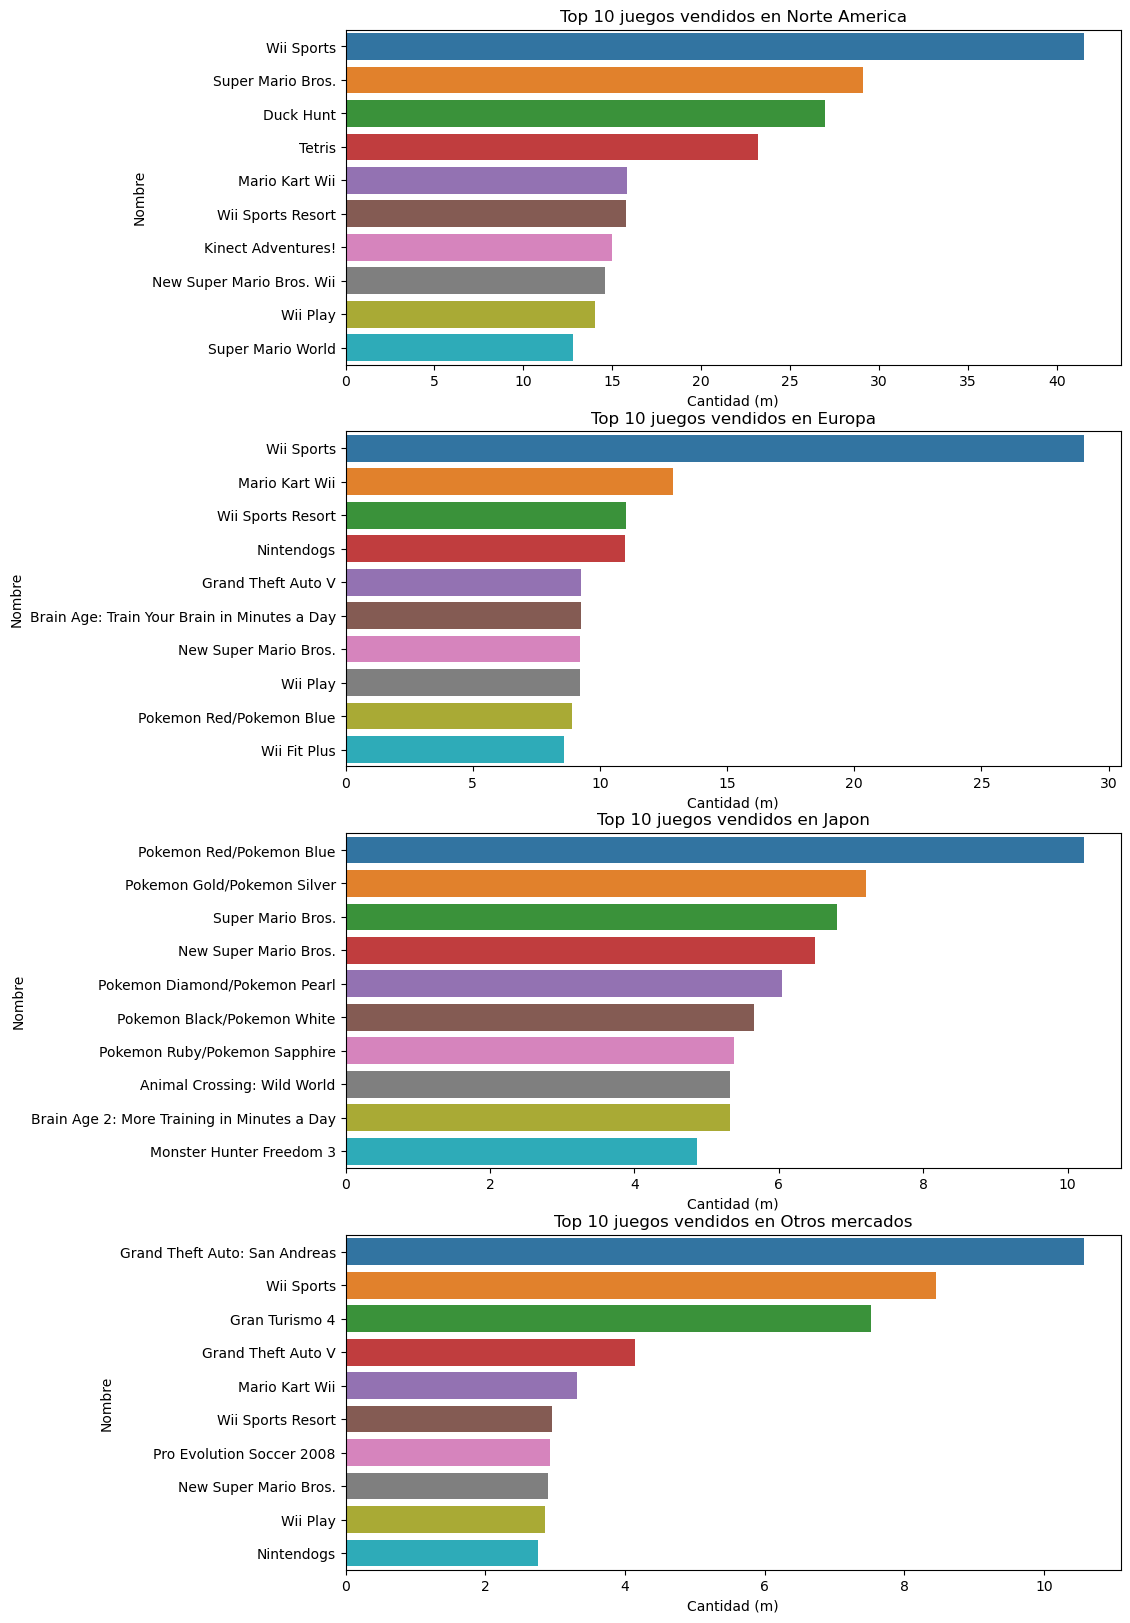

In [17]:
# Best selling games by market

fig, axes = plt.subplots(len(markets), 1, figsize=(10, 20))

for i, market in enumerate(markets):
    sales_sorted = df.sort_values(by=market["key"], ascending=False)[0:10]
    sns.barplot(data=sales_sorted[0:10], y="Name", x=market["key"], ax=axes[i])

    axes[i].set_xlabel("Cantidad (m)")
    axes[i].set_ylabel("Nombre")
    axes[i].set_title(f"Top 10 juegos vendidos en {market['name']}")


plt.show()

### 5. Generación de Insights y Comunicación


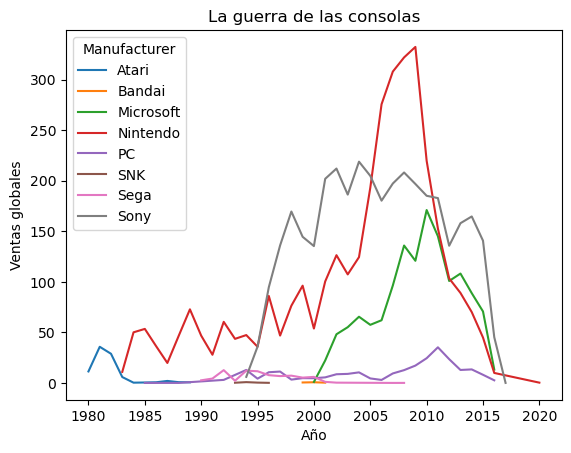

In [18]:
# The Console war --> https://en.wikipedia.org/wiki/Console_war

manufacturer_year_games = (
    df.groupby(["Manufacturer", "Year"]).agg({"Global_Sales": "sum"}).reset_index()
)

sns.lineplot(
    data=manufacturer_year_games,
    x="Year",
    y="Global_Sales",
    hue="Manufacturer",
)

plt.xlabel("Año")
plt.ylabel("Ventas globales")
plt.title("La guerra de las consolas")

plt.show()

#### Interpretación

En el gráfico superior se puede observar la suma de las ventas por empresa manufacturera y año, de modo tal que se pueden visualizar las "rivalidades" entre ellas, también llamado [Guerra de consolas](https://en.wikipedia.org/wiki/Console_war).

Algunos ejemplos en el gráfico son:

- 1990: Sega (Sega Saturn) vs Nintendo (NES)
- 2000: Sony (PS1) vs Nintendo (N64)
- 2010: Microsoft (Xbox 360) vs Sony (PS3)


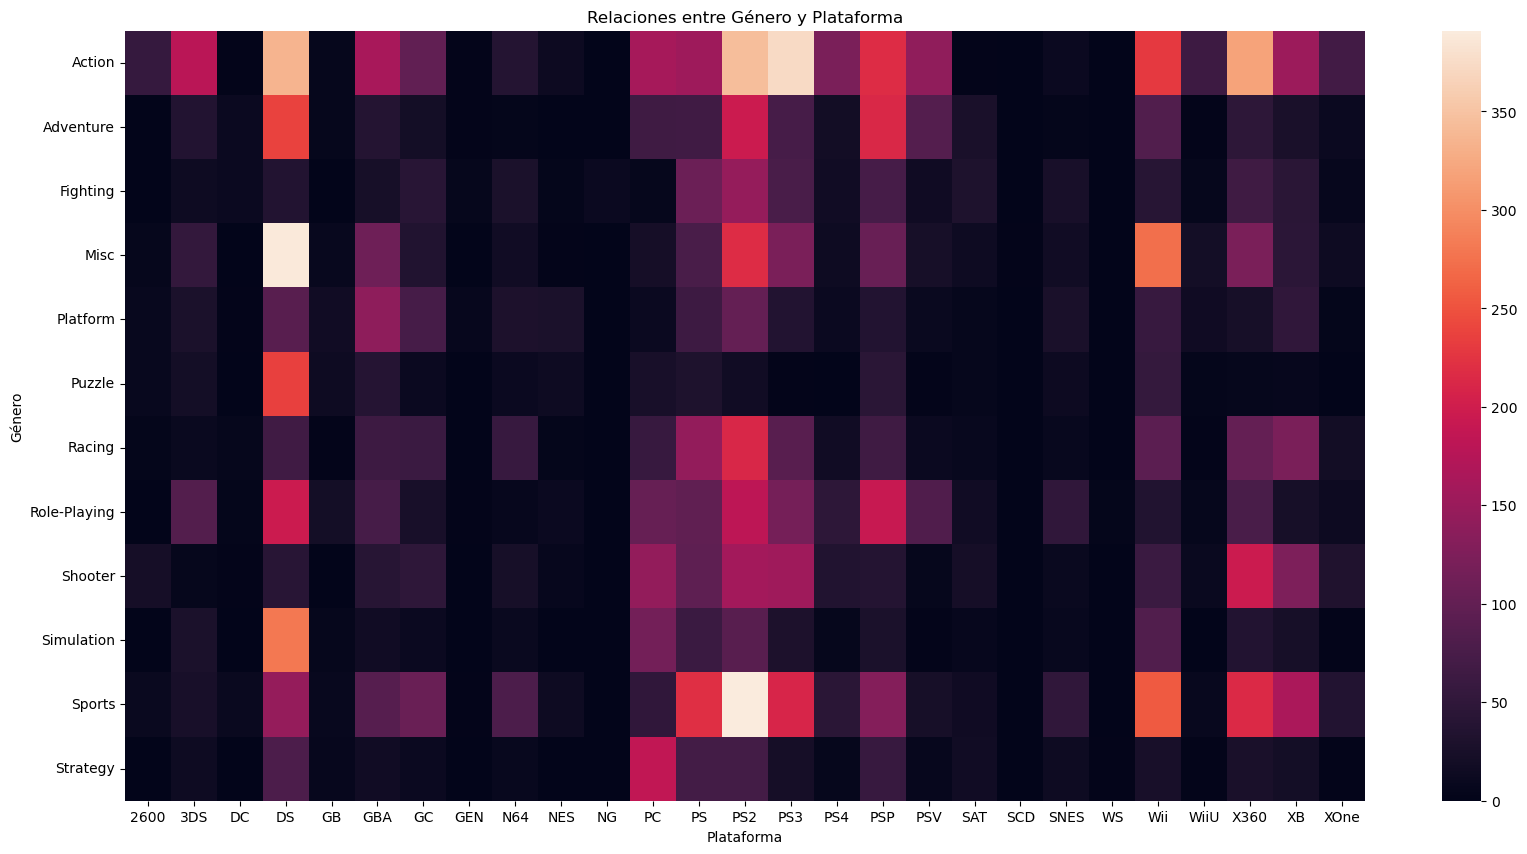

In [19]:
# Relational map between Genre and Platform

genre = df.groupby(["Genre", "Platform"]).agg({"Name": "count"}).reset_index()

plt.figure(figsize=(20, 10))

sns.heatmap(
    data=genre.pivot(index="Genre", columns="Platform", values="Name").fillna(0),
)

plt.title("Relaciones entre Género y Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Género")
plt.show()

#### Interpretación

En el gráfico de relación se puede visualizar la cantidad de tipo de géneros fueron lanzados por consola, donde mientras más claro sea el color de rectángulo, mas juegos de ese genero había disponible en la consola.

Algunos ejemplos claros son:

- Play Station 2 tuvo mayormente juegos de Acción y Deportes
- Nintendo DS tuve en gran medida juegos Misceláneos (es decir que no se pueden categorizar en un género en especifico), lo que demuestra porque sus juegos fueron tan originales.
- Wii se especializó mayormente en Deportes y Misceláneos.


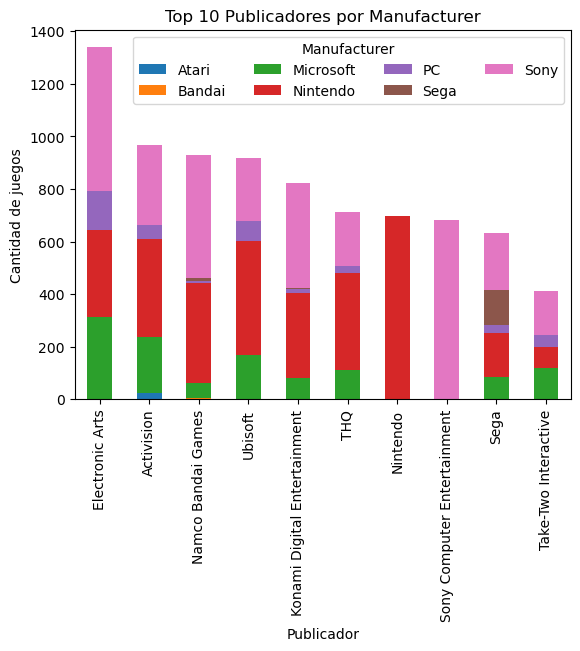

In [20]:
top_10_publisher = df["Publisher"].value_counts()[0:10].reset_index()

publisher_order = top_10_publisher.set_index("Publisher")

mask = df["Publisher"].isin(top_10_publisher["Publisher"])

publisher_manufacturer_counts = (
    df[mask]
    .groupby(["Publisher"])["Manufacturer"]
    .value_counts()
    .reset_index()
    .pivot(index="Publisher", columns="Manufacturer", values="count")
    .fillna(0)
)

publisher_manufacturer_counts_sorted = publisher_order.merge(
    publisher_manufacturer_counts, left_index=True, right_on="Publisher"
).drop(columns=["count"])

publisher_manufacturer_counts_sorted.plot(kind="bar", stacked=True)

plt.title("Top 10 Publicadores por Manufacturer")
plt.xlabel("Publicador")
plt.ylabel("Cantidad de juegos")
plt.legend(title="Manufacturer", ncol=4)

plt.show()

### Interpretación

En los gráficos de barras se puede visualizar el top 10 de publicadores de juegos y para que empresa manufacturera publicaron los juegos. Como se puede observar las primeras 4 son empresas que lanzan juegos para más de empresa manufacturera. En cambio hay publicadores que poseen un estudio dedicado a sacar juegos exclusivamente para sus consolas, como es el caso de Nintendo y Sony Computer.

Nota destacar que este gráfico no destaca la cantidad de ventas si no, de la cantidad de juegos que lanzaron al mercado.
